# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**DURATION CONSIDERED:**
- mtl: 1,2,3,4 and 5 minutes + 6 minutes as the reference  
- gva: 1,2,3,4,5,6,9 and 12 minutes + 15 minutes as the reference  

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K, or across multiple Ks)
    

In [1]:
import sys,json

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis_RSduration import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Initialization

### Load configuration file 

In [34]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Visualizing components: "gva" 1min vs 15min

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


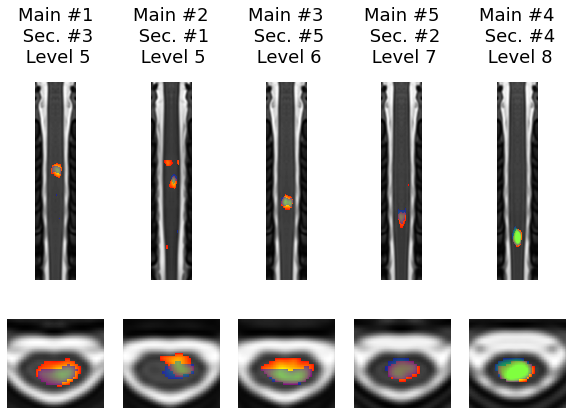

In [21]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration',"duration": "12min"}
params_qual_2 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration' ,"duration":"15min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_2,params2=params_qual_1)
plotting.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=1.5, uthresh=3, save_results=False)

### Visualizing components: "mtl" 1min vs 6min

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


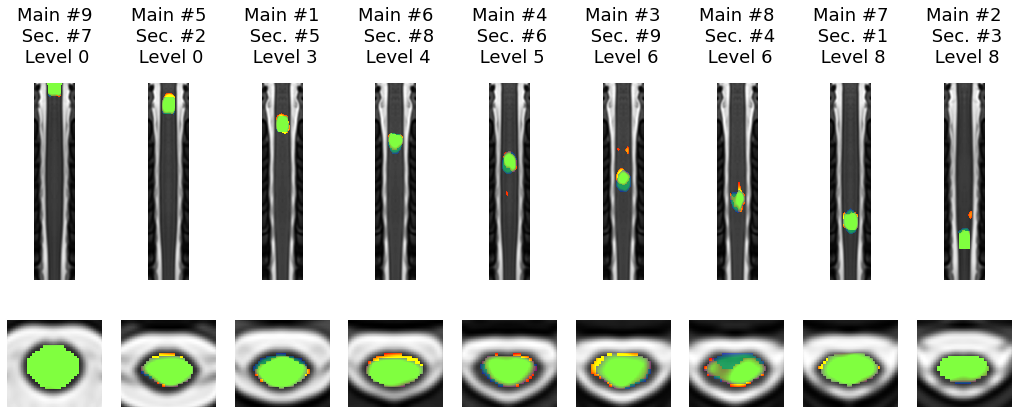

In [12]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':9, 'dataset':'mtl', 'analysis':'ica_duration',"duration": "1min"}
params_qual_2 = {'k':9, 'dataset':'mtl', 'analysis':'ica_duration',"duration": "6min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.5, uthresh=2.5, save_results=False)

# Quantitative analyses

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

METHOD 3: Comparing sets of components across durations
... Computing similarity for K=5 between t=1 min and t=15 min
... Computing similarity for K=5 between t=2 min and t=15 min
... Computing similarity for K=5 between t=3 min and t=15 min
... Computing similarity for K=5 between t=4 min and t=15 min
... Computing similarity for K=5 between t=5 min and t=15 min
... Computing similarity for K=5 between t=6 min and t=15 min
... Computing similarity for K=5 between t=9 min and t=15 min
... Computing similarity for K=5 between t=12 min and t=15 min
... Computing similarity for K=5 between t=15 min and t=15 min
[ 1  2  3  4  5  6  9 12 15]
[0.1330856418231508 0.17748817859657073 0.15156497703470637
 0.27272498312889637 0.1664159023934412 0.22420610622316514
 0.3589048027047038 0.5086405775448217 1.0]


AxisError: axis 1 is out of bounds for array of dimension 1

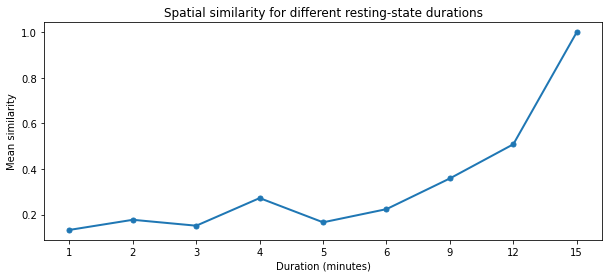

In [56]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[1,2,3,4,5,6,9,12,15]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"ica_duration",'t_range':[15]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Dice',save_results=True,save_figure=True)

In [58]:
A=[1, 2, 3, 4, 5, 6, 9, 12, 15]
B=[0.1330856418231508,0.17748817859657073,0.15156497703470637,0.27272498312889637,0.1664159023934412,0.22420610622316514,0.3589048027047038,0.5086405775448217 ,.0]

In [66]:
np.concatenate((np.array(A).reshape((9, 1)),np.array(B).reshape((9, 1))),axis=1)

array([[ 1.        ,  0.13308564],
       [ 2.        ,  0.17748818],
       [ 3.        ,  0.15156498],
       [ 4.        ,  0.27272498],
       [ 5.        ,  0.1664159 ],
       [ 6.        ,  0.22420611],
       [ 9.        ,  0.3589048 ],
       [12.        ,  0.50864058],
       [15.        ,  0.        ]])

In [43]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="mtl"
t_range=[1,2,3,4,5,6]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':dataset, 'analysis':"ica_duration",'t_range':[6]}
params_quant_gva_2 = {'k_range':range(9,10), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=9,t_range1=6,t_range2=t_range,similarity_method='Dice')

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/mtl/spinalcord/temporal_cropping/6min/K_9/comp_zscored/*4D_K*


IndexError: list index out of range

In [31]:
spine_analysis_gva.spatial_similarity(k1=5,t_range1=12,t_range2=[6,9],similarity_method='Dice')

NameError: name 'spine_analysis_gva' is not defined

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

In [88]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

In [89]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_1 = {'k_range':range(4,10), 'dataset':'gva', 'analysis':'ica'}
params_quant_gva_2 = {'k_range':range(4,10), 'dataset':'mtl', 'analysis':'ica'}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs mtl_ica at K = 9 

The mean similarity is 0.27


KeyError: 'output_dir'

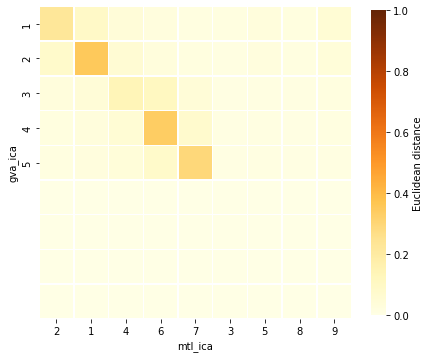

In [91]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,k2=9,similarity_method='Euclidean distance')

### Investigate axial distribution for different Ks

### `ICA` method

### Instantiate class

### Instantiate class

In [236]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.65


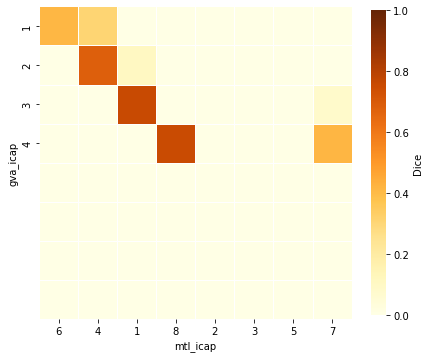

In [237]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.54


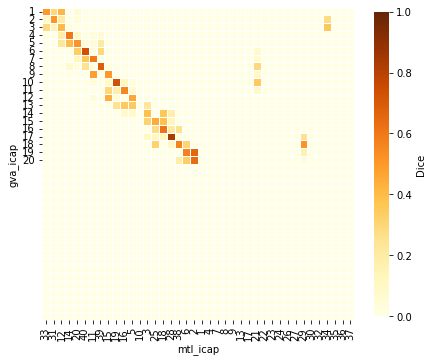

In [238]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')